In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.preprocessing import load_data, split_data
from src.model import build_xgboost
from src.evaluation import evaluate_model, feature_importance


In [12]:
df = load_data("data/creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


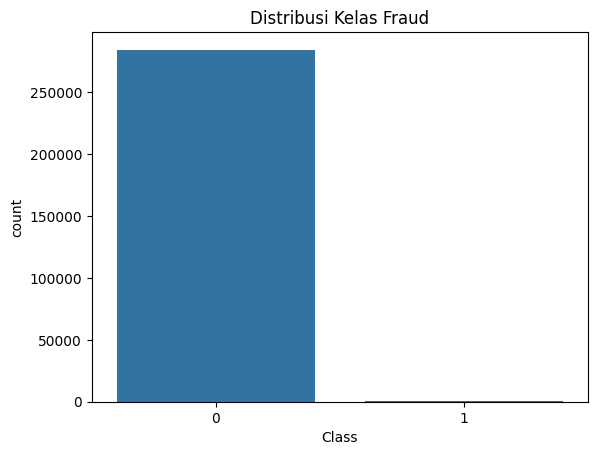

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

In [13]:
sns.countplot(x='Class', data=df)
plt.title("Distribusi Kelas Fraud")
plt.show()

df['Class'].value_counts(normalize=True)


In [14]:
X_train, X_test, y_train, y_test = split_data(df)


In [15]:
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()

scale_pos_weight = neg / pos
scale_pos_weight


np.float64(577.2868020304569)

In [16]:
model = build_xgboost(scale_pos_weight)
model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [17]:
evaluate_model(model, X_test, y_test)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.86      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [18]:
feature_importance(model)


<Figure size 1000x600 with 0 Axes>

In [19]:
import pickle
import os

os.makedirs('model', exist_ok=True)

with open('model/xgb_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model berhasil disimpan!")


Model berhasil disimpan!
